<a href="https://colab.research.google.com/github/MouseLand/cellpose/blob/master/notebooks/run_cellpose_GPU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: data preperation

In [2]:
import sys
sys.path.append('..')

In [3]:
from cellpose_dynamics import compute_masks
import tifffile
import numpy as np
# from cellpose.dynamics import masks_to_flows_gpu, masks_to_flows
import glob
import time, os, sys
from urllib.parse import urlparse
import skimage.io
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.rcParams['figure.dpi'] = 300

from urllib.parse import urlparse



# a = 

# normalize input image

In [2]:
def normalize99(Y, lower=1,upper=99):
    """ normalize image so 0.0 is 1st percentile and 1.0 is 99th percentile """
    X = Y.copy()
    x01 = np.percentile(X, lower)
    x99 = np.percentile(X, upper)
    X = (X - x01) / (x99 - x01)
    return X

def normalize(Y):
    """ normalize image so 0.0 is 1st percentile and 1.0 is 99th percentile """
    X = Y.copy()
    # x01 = np.percentile(X, lower)
    # x99 = np.percentile(X, upper)
    X = (X - np.min(X)) / (np.max(X)- np.min(X))
    return X

In [6]:
# image normalization 
# image_input_path = '/data/nanolive/06222023_segmentation/*.tiff'
# image_output_path = '/data/nanolive/06222023_segmentation/images_nor_001_9999/'

image_input_path ='/data/nanolive/Zihan/04042022_adherent_crowd/*frame1*.tiff'
image_output_path ='/data/nanolive/Zihan/04042022_adherent_crowd/images_nor_001_9999/'

# image_input_path = '/home/xzhang/Projects/cellpose/Nanolive_mem_cellpose_data_v5/images/*.tiff'
# image_output_path = '/home/xzhang/Projects/cellpose/Nanolive_mem_cellpose_data_v5/images_nor/'

# image_input_path ='/data/download_data/colon_dataset/colon_30/images/*.tif'

# image_output_path ='/data/nanolive/Zihan/04042022_adherent_crowd/images_nor_001_9999/'

image_paths = glob.glob(image_input_path)
print(len(image_paths))
# for i in range(len(image_paths)):
for i in image_paths:

    filename =i.split('/')[-1].split('.')[0]
    print(filename)
    # break
    image = tifffile.imread(i)
    # image_nor = normalize99(image, lower=0.01,upper=99.99)
    image_nor = normalize99(image, lower=1,upper=99)
    # image_nor = normalize(image)
    image_nor = np.clip(image_nor, 0, 1)
    tifffile.imwrite(image_output_path+filename+'.tiff', np.uint8(255*image_nor))
    # break


100
50uM_ZnCl_pH=7_RI_frame113
50uM_ZnCl_pH=7_RI_frame108
50uM_ZnCl_pH=7_RI_frame136
50uM_ZnCl_pH=7_RI_frame194
50uM_ZnCl_pH=7_RI_frame189
50uM_ZnCl_pH=7_RI_frame129
50uM_ZnCl_pH=7_RI_frame156
50uM_ZnCl_pH=7_RI_frame145
50uM_ZnCl_pH=7_RI_frame114
50uM_ZnCl_pH=7_RI_frame134
50uM_ZnCl_pH=7_RI_frame193
50uM_ZnCl_pH=7_RI_frame160
50uM_ZnCl_pH=7_RI_frame109
50uM_ZnCl_pH=7_RI_frame169
50uM_ZnCl_pH=7_RI_frame177
50uM_ZnCl_pH=7_RI_frame168
50uM_ZnCl_pH=7_RI_frame192
50uM_ZnCl_pH=7_RI_frame183
50uM_ZnCl_pH=7_RI_frame111
50uM_ZnCl_pH=7_RI_frame130
50uM_ZnCl_pH=7_RI_frame101
50uM_ZnCl_pH=7_RI_frame143
50uM_ZnCl_pH=7_RI_frame167
50uM_ZnCl_pH=7_RI_frame150
50uM_ZnCl_pH=7_RI_frame181
50uM_ZnCl_pH=7_RI_frame138
50uM_ZnCl_pH=7_RI_frame190
50uM_ZnCl_pH=7_RI_frame122
50uM_ZnCl_pH=7_RI_frame172
50uM_ZnCl_pH=7_RI_frame137
50uM_ZnCl_pH=7_RI_frame135
50uM_ZnCl_pH=7_RI_frame165
50uM_ZnCl_pH=7_RI_frame121
50uM_ZnCl_pH=7_RI_frame110
50uM_ZnCl_pH=7_RI_frame162
50uM_ZnCl_pH=7_RI_frame117
50uM_ZnCl_pH=7_RI_frame1

# make flow images

In [11]:
#allen cell dataset
# mask_input_path = '/data/download_data/quilt-data-access-tutorials-main/all_fov/allen100/masks/*.tiff'
# flow_output_path = '/data/download_data/quilt-data-access-tutorials-main/all_fov/allen100/masks_with_flows/'

#Nanolive dataset
# mask_input_path = '/home/xzhang/Projects/cellpose/Nanolive_mem_cellpose_data_v5_nor/labels/17*.tiff'
# flow_output_path = '/home/xzhang/Projects/cellpose/Nanolive_mem_cellpose_data_v5_nor/masks_with_flows/'


# mask_input_path = '/home/xzhang/Projects/cellpose/Nanolive_mem_cellpose_data_dboundary/labels/*.tiff'
# flow_output_path = '/home/xzhang/Projects/cellpose/Nanolive_mem_cellpose_data_dboundary/masks_with_flows/'

#colon dataset
# mask_input_path = '/home/xzhang/Projects/cellpose/colon/labels/*.tif'
# flow_output_path = '/home/xzhang/Projects/cellpose/colon/masks_with_flows/'

mask_input_path = '/data/download_data/colon_dataset/colon_30/labels/*.tif'
flow_output_path = '/data/download_data/colon_dataset/colon_30/masks_with_flows/'

# mask_input_path = '/home/xzhang/Projects/cellpose/Nanolive_mem_cellpose_data_v5_nor_1_99/cellpose_size_2500_36_RI_time00h00m00s*.tiff'
# flow_output_path = '/home/xzhang/Projects/cellpose/'
# mask  =  tifffile.imread(mask_input_path)




Check CUDA version and GPU

import libraries and check GPU (the first time you import cellpose the models will download).

In [12]:
# convert mask <------>flow <---> mask
import glob
from cellpose_dynamics import masks_to_flows
from cellpose_utils import remove_edge_masks,masks_to_edges
#1. orginal mask
# data_dir  = ''
# mask_input_path = data_dir + '/raw'
# mask_input_path ='/data/nanolive/Zihan/04042022_adherent_crowd/test_flow2mask/50uM_ZnCl_pH=7_RI_frame001_cp_masks_stitchthre04_finetuned2.tiff'
# mask_input_files = sorted(glob.glob(mask_input_path))
# # mask_input_files = mask_input_files[:1]
# print(mask_input_files)

def normalize8(I):
    mn = I.min()
    mx = I.max()
    mx -= mn
    I = ((I - mn)/mx) * 255
    return I.astype(np.uint8)

def batch_masks_to_flows(input_path,output_path,delete_edges=True,binary2sequential=False):
    mask_input_files = glob.glob(input_path)
    print(mask_input_files)
    for file in mask_input_files:
        mask = tifffile.imread(file)
        if binary2sequential:
            from skimage import measure
            mask =  measure.label(mask)
        output_image  = np.zeros((4,)+mask.shape,dtype=float)
        output_file_name = file.split('/')[-1].split('.')[0]+'_mask_with_flow.tiff'

        flows = masks_to_flows(mask)
        print(flows.max(),flows.min())
        flows = normalize8(flows)
        print(flows.max(),flows.min())
        if delete_edges:
            edges = masks_to_edges(mask.astype(np.uint8))
            mask = (mask>0).astype(np.uint8) - edges
 
       
        
        output_image[0,...] = mask
        output_image[1:,...] = flows
        tifffile.imwrite(output_path + output_file_name, np.uint8(output_image))


batch_masks_to_flows(mask_input_path,flow_output_path,delete_edges=False, binary2sequential=True)


['/home/xzhang/Projects/cellpose/Nanolive_mem_cellpose_data_v5_nor_1_99/cellpose_size_2500_36_RI_time00h00m00s_pred.tiff']


/home/xzhang/anaconda3/envs/monai/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/xzhang/anaconda3/envs/monai/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


2.0 -2.0
255 0


# results visualization

In [5]:
# image = tifffile.imread('/data/nanolive/Zihan/04042022_adherent_crowd/flow_4c_zcyx.tiff')
# print(image.shape)

import numpy as np
import tifffile 
import matplotlib.pyplot as plt
from cellpose_utils import remove_edge_masks,masks_to_edges

# image =  tifffile.imread('/data/programs/monai_research_contributions/SwinUNETR/Nanolive_mem_cellpose/label/flow_4c_instance_zcyx.tiff')
# image =  tifffile.imread('/data/programs/monai_research_contributions/SwinUNETR/Nanolive_mem_cellpose/label/flow_4c_instance_zcyx.tiff')
image =  tifffile.imread('/home/xzhang/Projects/cellpose/50uM_ZnCl_pH=7_RI_frame001_cp_masks_stitchthre04_finetuned2mask_with_flow.tiff')
print(image.shape)
# rm_edge = remove_edge_masks(image[:,0,:,:])
CZXY =1
if CZXY:
    fig, axes = plt.subplots(2, 4,sharex=True, sharey=True, figsize=(15,10), dpi=900)
    zzz =36
    axes[0][0].imshow(image[0,zzz,:,:])
    # axes[0][0].imshow(mask_minus_edges[zzz,:,:])
    # axes[0][0].set_title("image channel 0")
    axes[0][1].imshow(image[1,zzz,:,:])
    # axes[0][1].set_title("image channel 1")

    axes[0][2].imshow(image[2,zzz,:,:])
    # axes[1][0].set_title("label channel 0")
    axes[0][3].imshow(image[3,zzz,:,:])
    # axes[1][1].set_title("label channel 1")
    # axes[1][2].imshow(train_label[1][2])
    # axes[1][2].set_title("label channel 2")
    # axes[1][3].imshow(lbl[1])
    # axes[1][3].set_title("lbl boundary")
    image1 =image.copy()
    image1[0,...] =image[0,...]>0
    print('image1 CZXY shape',image1.shape)
    axes[1][0].imshow(image1[0,zzz,:,:])
    # axes[0][0].set_title("image channel 0")
    axes[1][1].imshow(image1[1,zzz,:,:])
    # axes[0][1].set_title("image channel 1")

    axes[1][2].imshow(image1[2,zzz,:,:])
    # axes[1][0].set_title("label channel 0")
    axes[1][3].imshow(image1[3,zzz,:,:])

else:
    edges = masks_to_edges(image[:,0,:,:].astype(np.uint8)).astype(np.uint8)
    mask_minus_edges = (image[:,0,:,:]>0).astype(np.uint8) - edges
    fig, axes = plt.subplots(2, 4,sharex=True, sharey=True, figsize=(15,10), dpi=900)
    zzz =36
    # axes[0][0].imshow(image[zzz,0,:,:])
    axes[0][0].imshow(image[zzz,0,:,:])
    # axes[0][0].set_title("image channel 0")
    axes[0][1].imshow(image[zzz,1,:,:])
    # axes[0][1].set_title("image channel 1")

    axes[0][2].imshow(image[zzz,2,:,:])
    # axes[1][0].set_title("label channel 0")
    axes[0][3].imshow(image[zzz,3,:,:])
    # axes[1][1].set_title("label channel 1")
    # axes[1][2].imshow(train_label[1][2])
    # axes[1][2].set_title("label channel 2")
    # axes[1][3].imshow(lbl[1])
    # axes[1][3].set_title("lbl boundary")
    image1 =image.copy()
    print('image1 shape',image1.shape)

    axes[1][0].imshow(image1[zzz,0,:,:])
    # axes[0][0].set_title("image channel 0")
    axes[1][1].imshow(image1[zzz,1,:,:])
    # axes[0][1].set_title("image channel 1")

    axes[1][2].imshow(image1[zzz,2,:,:])
    # axes[1][0].set_title("label channel 0")
    axes[1][3].imshow(image1[zzz,3,:,:])
    # image1[:,0,...] =image[:,0,...]>0
# tifffile.imwrite('/data/programs/monai_research_contributions/SwinUNETR/Nanolive_mem_cellpose/label/flow_4c_new_zcyx.tiff',np.uint8(image1))


FileNotFoundError: [Errno 2] No such file or directory: '/home/xzhang/Projects/cellpose/50uM_ZnCl_pH=7_RI_frame001_cp_masks_stitchthre04_finetuned2mask_with_flow.tiff'

In [2]:
print(image1[0].max(),image1[0].min())

1.0 0.0


# data stat and mask preparation

In [1]:
import glob
import tifffile
import numpy as np

data_folder = '/home/xzhang/Projects/cellpose/Nanolive_mem_cellpose_data_v5_nor'
# data_folder ='/data/nanolive/06222023_segmentation/'
mask_files = glob.glob(data_folder +'/labels/*tiff')
# image_files = glob.glob(data_folder+'/images/*tiff')
image_files = glob.glob(data_folder+'/images/'+'/*tiff')
print(len(mask_files),len(image_files))
avgs = []
stds = []
percentile99=[]
percentile10=[]
for image_file in image_files:
    image = tifffile.imread(image_file)
    image_avg = np.mean(image)
    image_std = np.std(image)


    avgs.append(image_avg)
    stds.append(image_std)
    percentile99.append(np.percentile(image,99))
    percentile10.append(np.percentile(image,10))
print('average value:',avgs,'\n','std:',stds,'\n',percentile10,percentile99)

5 5
average value: [32.331631620725, 30.39495333035787, 49.703170696894325, 29.264349699020386, 37.170473178227745] 
 std: [43.04092995239506, 37.23281479940251, 36.982850031246876, 40.23592468289967, 44.98673842105982] 
 [6.0, 6.0, 13.0, 5.0, 7.0] [230.0, 221.0, 203.0, 231.0, 231.0]


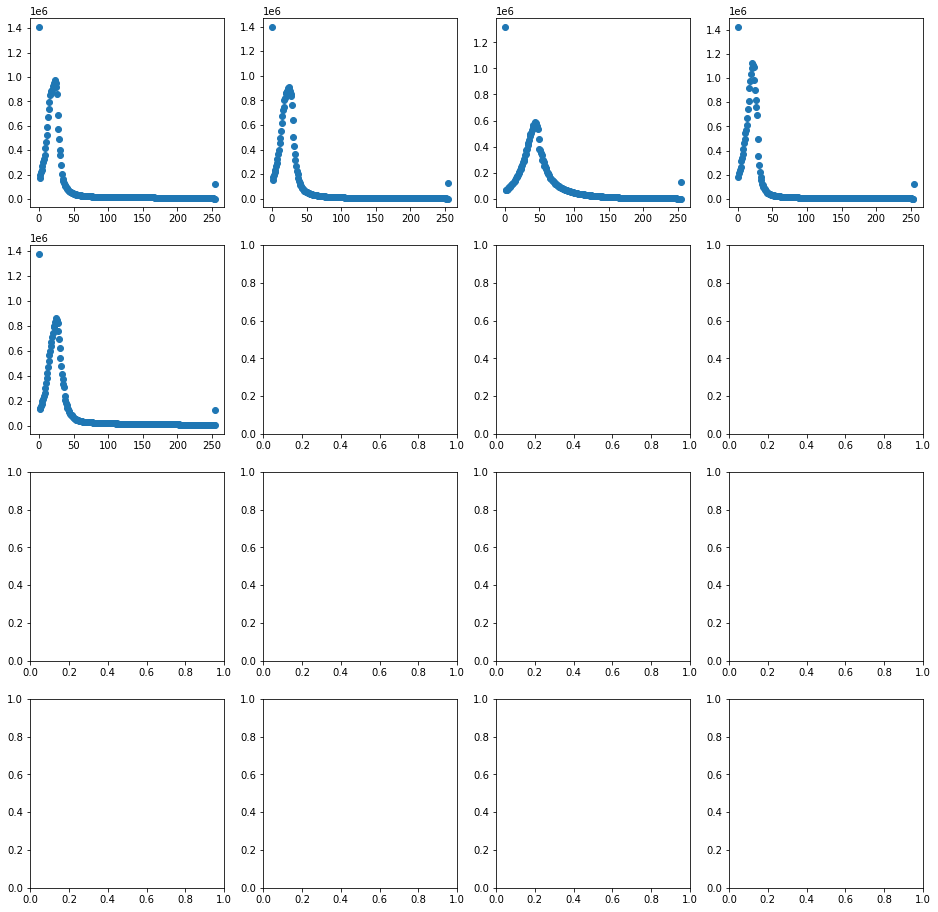

In [4]:
from skimage.exposure import histogram
from matplotlib import pyplot as plt
# counts_fitc, bins_fitc = histogram(image)

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))
counter = 0
for image_file in image_files:
    image = tifffile.imread(image_file)
    counts_fitc, bins_fitc = histogram(image)
    axes[counter//4, counter%4].scatter(bins_fitc,counts_fitc)
    counter += 1

In [19]:
# for i in range(len(avgs)):
#     print('average value:',avgs[i],'\n','std:',stds[i],'\n')

for i in range(len(avgs)):
    print('average value:',percentile10[i],'\n','std:',percentile99[i],'\n')

average value: 21405.0 
 std: 35204.0 

average value: 29096.0 
 std: 45155.0 

average value: 13361.0 
 std: 25124.0 

average value: 15661.0 
 std: 32026.0 

average value: 17019.0 
 std: 32699.0 

average value: 22236.0 
 std: 38391.0 

average value: 20272.0 
 std: 33872.0 

average value: 26120.0 
 std: 39888.0 

average value: 20575.0 
 std: 35070.0 

average value: 21905.0 
 std: 37716.0 

average value: 18450.0 
 std: 35613.0 

average value: 24382.0 
 std: 42727.0 

average value: 23145.0 
 std: 36293.0 

average value: 28706.0 
 std: 40530.0 

average value: 21028.0 
 std: 36865.0 

average value: 19314.0 
 std: 33111.0 

average value: 26969.0 
 std: 41060.0 

average value: 26895.0 
 std: 44364.539999999106 

average value: 21761.0 
 std: 37937.0 

average value: 23317.0 
 std: 42379.0 

average value: 23316.0 
 std: 40368.0 

average value: 27709.0 
 std: 43549.0 

average value: 31532.0 
 std: 47858.0 

average value: 24182.0 
 std: 39563.0 

average value: 25932.0 
 std:

In [ ]:
# view histograms

# function to delete masks in specific layer

In [7]:
import tifffile
import glob
import numpy as np

# mask_folder = "/home/xzhang/Projects/cellpose/Nanolive_mem_cellpose_data_v5/images/"
# mask_folder = "/home/xzhang/Projects/cellpose/Nanolive_mem_cellpose_data_v5_nor/labels/"

mask_folder = "/data/nanolive/06222023_segmentation/ws_masks/"
mask_files = glob.glob(mask_folder +'73*tif')
print(mask_files)
image = tifffile.imread(mask_files[0])
image[0:23] =0
image[65:] = 0
#
threshold = 5000
if True:  #apply size filter ??? or not
    img_label,img_counts = np.unique(image,return_counts=True)
    print(len(img_label),len(img_counts))
    for idx,label in enumerate(img_label):

        if img_counts[idx]<threshold:
            image[image==label]=0 #delete cell

tifffile.imwrite(mask_folder+'73result.tiff',image)
print(image.shape)

['/data/nanolive/06222023_segmentation/ws_masks/73_RI_time00h00m00s_cp_masks.tif']
110 110
(96, 512, 512)


# raw image  --> output mask

In [70]:

import tifffile
import glob
from skimage.filters.thresholding import threshold_otsu
import scipy.ndimage as ndi
from skimage.feature import peak_local_max
from skimage.segmentation import watershed
import numpy as np


# the gaussian_filter function expects a smoothing factor sigma, so we will arbitrarily define one (this can change later)
# raw image  --> output mask

# data_folder ='/data/nanolive/06222023_segmentation/'
# output_folder ='/data/nanolive/06222023_segmentation/ws_masks/'

data_folder = '/data/nanolive/Zihan/protoplast/protoplastinfection3D/'
output_folder = '/data/nanolive/Zihan/protoplast/protoplastinfection3D/ws_masks/'

data_files = glob.glob(data_folder +'*tiff')
print(len(data_files))

for file in data_files[:1]:
    filename = file.split('/')[-1].split('.')[0]+'_ws_mask.tiff'
    image = tifffile.imread(file)
    sigma = 4
    img_smooth = ndi.filters.gaussian_filter(image, sigma)
    thresh = threshold_otsu(img_smooth)
    print(image.max(),image.min(),thresh)
    # mem_otsu = img_smooth > 0.95*thresh
    mem_otsu = img_smooth > 0.9999*thresh
    # mem_default = ndi.binary_opening(mem8)  # Short form
    dist_trans = ndi.distance_transform_edt(mem_otsu)
    dist_trans_smooth = ndi.filters.gaussian_filter(dist_trans, sigma=3)
    seeds = peak_local_max(dist_trans_smooth, indices=False, min_distance=10)
    seeds_dil = ndi.filters.maximum_filter(seeds, size=20)
    seeds_labeled = ndi.label(seeds)[0]
    seeds_labeled_dil = ndi.filters.maximum_filter(seeds_labeled, size=10)  # Expand a bit for visualization
    ws = watershed(-img_smooth, seeds_labeled_dil, mask=mem_otsu)
    #-----size filter---
    threshold = 2000
    img_label,img_counts = np.unique(ws,return_counts=True)
    for label in img_label:
        if img_counts[label]<threshold:
            ws[ws==label]=0 #delete cell
    #------------------------------------------
    tifffile.imwrite(output_folder+ filename,np.uint8(ws))
    # break

328


/tmp/ipykernel_26334/4125079871.py:26: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  img_smooth = ndi.filters.gaussian_filter(image, sigma)


1.4625599 1.3365365 1.3811393


/tmp/ipykernel_26334/4125079871.py:33: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  dist_trans_smooth = ndi.filters.gaussian_filter(dist_trans, sigma=3)
/tmp/ipykernel_26334/4125079871.py:34: FutureWarning: indices argument is deprecated and will be removed in version 0.20. To avoid this warning, please do not use the indices argument. Please see peak_local_max documentation for more details.
  seeds = peak_local_max(dist_trans_smooth, indices=False, min_distance=10)
/tmp/ipykernel_26334/4125079871.py:35: DeprecationWarning: Please use `maximum_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  seeds_dil = ndi.filters.maximum_filter(seeds, size=20)
/tmp/ipykernel_26334/4125079871.py:37: DeprecationWarning: Please use `maximum_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  seeds_labeled_dil = nd

True False


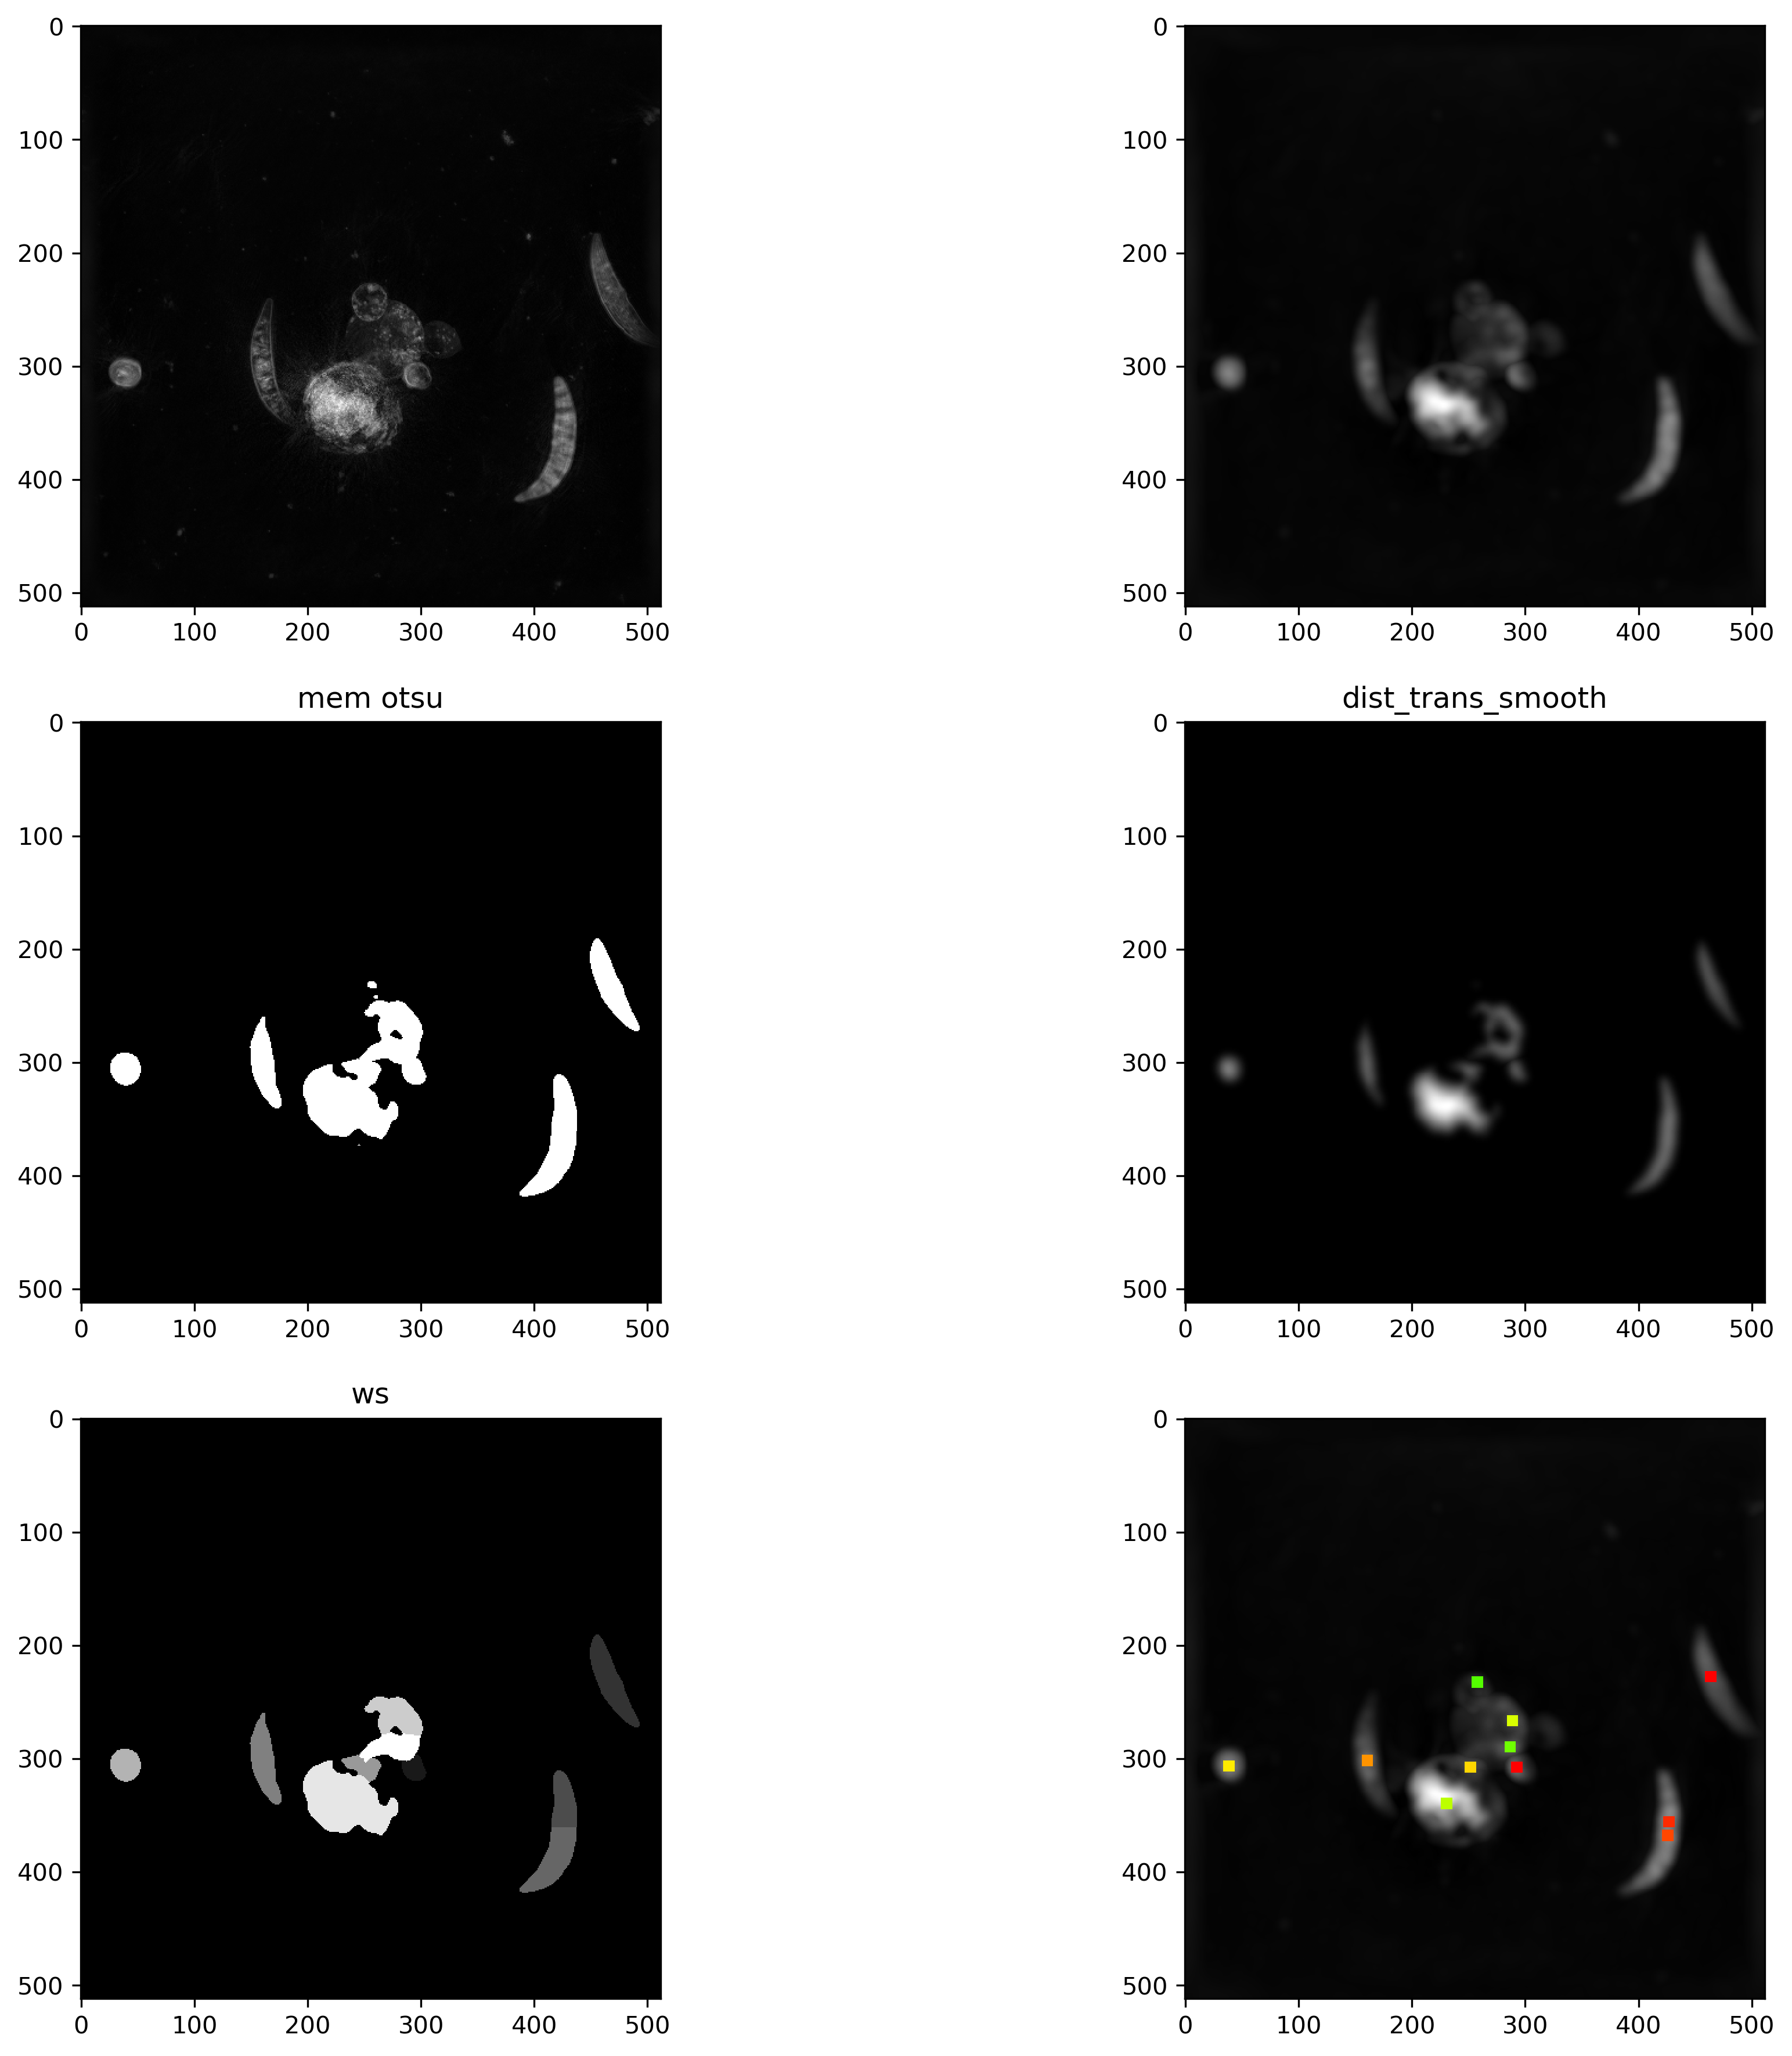

In [71]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(3,2,figsize=(15, 15))

ax[0,0].imshow(np.max(image,axis=0), interpolation='none', cmap='gray')

ax[0,1].imshow(np.max(img_smooth,axis=0), interpolation='none', cmap='gray')

ax[1,0].imshow(np.max(mem_otsu,axis=0), interpolation='none', cmap='gray')
ax[1,0].set_title("mem otsu")
print(mem_otsu.max(),mem_otsu.min())
ax[1,1].imshow(np.max(dist_trans_smooth,axis=0), interpolation='none', cmap='gray')
ax[1,1].set_title("dist_trans_smooth")

ax[2,0].imshow(np.max(ws,axis=0), interpolation='none', cmap='gray')
ax[2,0].set_title("ws")

maskb = np.ma.array(seeds_labeled_dil, mask=seeds_labeled_dil==0)

ax[2,1].imshow(np.max(img_smooth,axis=0), interpolation='none', cmap='gray')
ax[2,1].imshow(np.max(maskb,axis=0), interpolation='none', cmap='prism')
plt.show()

# finetune masks: rough mask -->>>> finetuned mask

In [1]:
import tifffile
import glob
# mask_folder = "/home/xzhang/Projects/cellpose/Nanolive_mem_cellpose_data_v5_nor/labels/*.tiff"
# output_folder = "/home/xzhang/Projects/cellpose/Nanolive_mem_cellpose_data_v5_nor/labels/"

# mask_folder = "/data/nanolive/06222023_segmentation/ws_masks/3_*.tiff"
# output_folder = "/data/nanolive/06222023_segmentation/ws_masks/"


mask_folder = "/home/xzhang/Projects/cellpose/Nanolive_mem_cellpose_data_v5_nor/labels/17_*.tiff"
output_folder = "/home/xzhang/Projects/cellpose/Nanolive_mem_cellpose_data_v5_nor/labels/"

mask_files = glob.glob(mask_folder)
print(len(mask_files))



1


In [2]:
import numpy as np
from scipy.ndimage import binary_opening
i = 9
SE = (np.mgrid[:i, :i, :i][0] - np.floor(i/2))**2 + \
         (np.mgrid[:i, :i, :i][1] - np.floor(i/2))**2 + \
         (np.mgrid[:i, :i, :i][2] - np.floor(i/2))**2 <= np.floor(i/2)**2
def multi_class_mask_binary_opening(mask,SE):
    # Create an empty array to store the result
    result = np.zeros_like(mask)

    # Get unique labels in the mask, excluding the background (label 0)
    labels = np.unique(mask)[1:]

    # Perform binary opening separately for each label
    for label in labels:
        binary_mask = (mask == label).astype(np.uint8)
        opened_mask = binary_opening(binary_mask,structure=SE)
        result += opened_mask * label

    return result

# Example usage:
# Assuming 'mask' is a 3D mask with multiple labels
# opened_mask = multi_class_mask_binary_opening(mask)
for i in range(len(mask_files)):
    mask = tifffile.imread(mask_files[i])
    filename = mask_files[i].split('/')[-1].split('.')[0]
    print(filename)
    mask_new = multi_class_mask_binary_opening(mask,SE)
    tifffile.imwrite(output_folder+filename+'_new.tiff',mask_new)
    # break

17_RI_time00h00m00sws_mask
